### Analyzing Time Series

#### Warmup 🌶🌶🌶: Compose a Time Series
- **Trend**
- **Seasonality**
- Remainder
    - Time Dependence
    - **Noise**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#arbitrary x data
x = np.linspace(0, 10, 101)

In [3]:
len(x)

101

In [4]:
#First component: Random noise
# np.random.randint(low=0, high= 5, size=101)
y_noise = np.random.normal(size=101)

In [5]:
# plt.plot(x, y_noise)

In [5]:
#Second component: trend
y_trend = 3*x
# plt.plot(x, y_trend)

In [6]:
#Third component: seasonality
y_season = np.sin(5*x)

In [7]:
y_time_series = y_noise + y_trend + 5*y_season

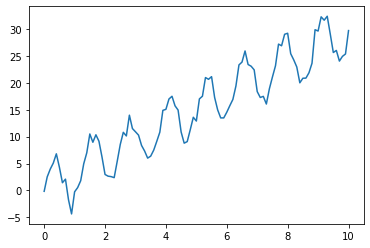

In [8]:
plt.plot(x, y_time_series)

---
---

### Let's analyze ("decompose") a Time Series

In [9]:
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
#import numpy as np

#some aesthetic setting for plotting for the rest of the notebook
sns.set()
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
df = pd.read_csv('flights.csv', index_col=0, parse_dates=True)

In [11]:
len(np.unique(df.index.year))

12

### 1. TRAIN-TEST-SPLIT

In [12]:
df_train = df[:'Dec 1959'].copy()
df_test = df['Jan 1960':].copy()

In [13]:
df_train.shape, df_test.shape

((132, 1), (12, 1))

---

<AxesSubplot:xlabel='date'>

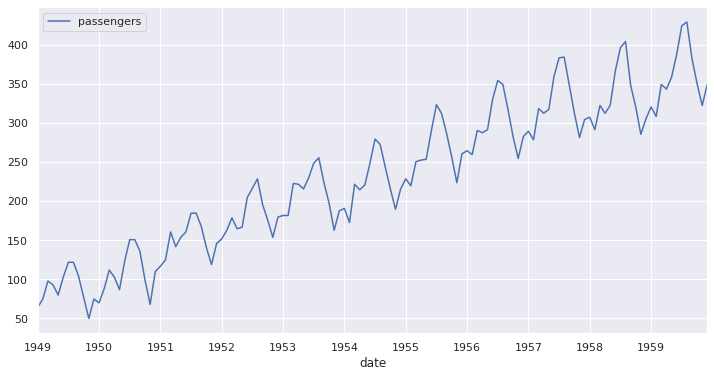

In [14]:
df_train.plot()

### 2. Model the Trend
- one of the three components

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
m = LinearRegression()

In [17]:
df_train['timestep'] = range(len(df_train))

In [18]:
X = df_train[['timestep']] #matrix
y = df_train['passengers'] #vector

In [19]:
m.fit(X, y)

LinearRegression()

In [20]:
m.coef_ #our trend

array([2.31764439])

In [21]:
df_train['trend'] = m.predict(X)

<AxesSubplot:xlabel='date'>

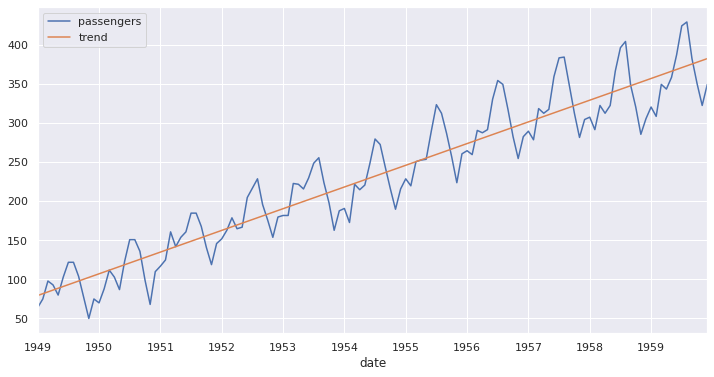

In [22]:
df_train[['passengers', 'trend']].plot()

<AxesSubplot:xlabel='date'>

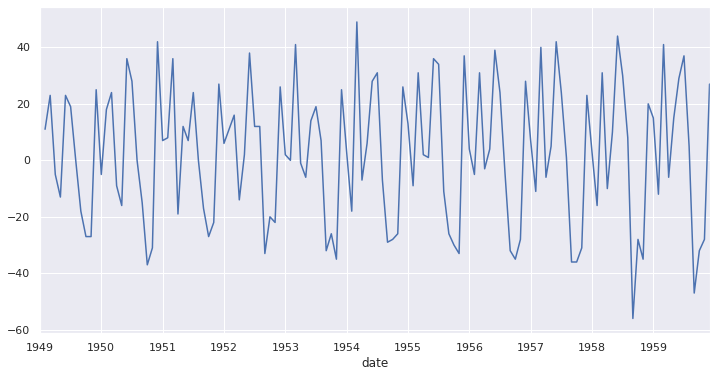

In [23]:
df_train['passengers'].diff().plot()

### 3. Model the seasonality
- another of the three components

- Technically, in this example, we are modeling both the trend and seasonality together, but we could also do them separately.

<AxesSubplot:xlabel='date'>

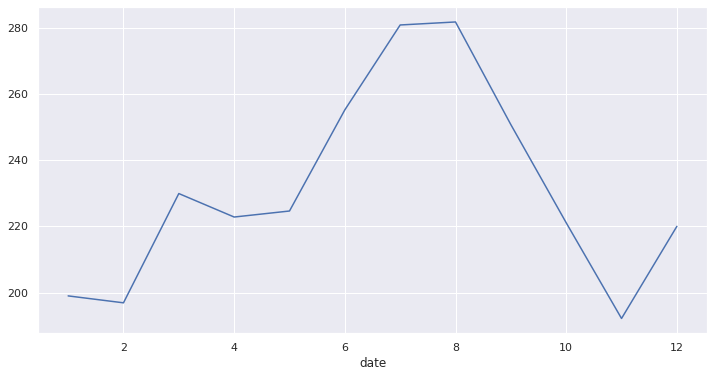

In [24]:
df_train.groupby(df_train.index.month)['passengers'].mean().plot()

<AxesSubplot:xlabel='date'>

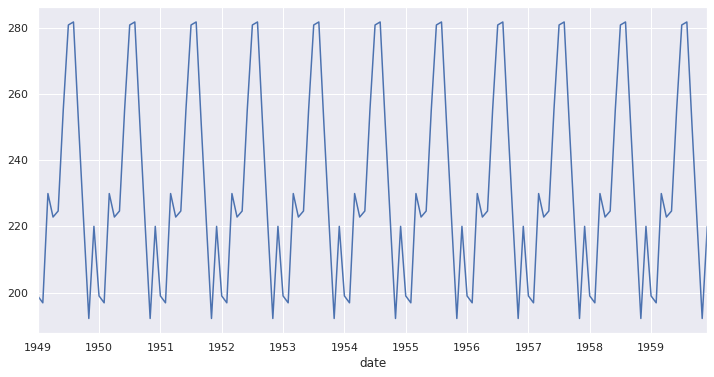

In [25]:
df_train.groupby(df_train.index.month)['passengers'].transform('mean').plot()

Model the seasonality in sklearn:

In [26]:
df_train['month'] = df_train.index.month

In [27]:
#one-hot encode the month
#dummy encoding = one-hot encoding
seasonal_dummies = pd.get_dummies(df_train['month'], prefix='month_')

In [28]:
df_train = df_train.join(seasonal_dummies)

In [29]:
X = df_train.drop(['passengers', 'trend', 'month'], axis=1)
#now our input data is the timestep and the one-hot-encoded months (dropping everything else)

In [30]:
y = df_train['passengers']
#our target variable is still passengers

In [31]:
m.fit(X, y) 

LinearRegression()

In [32]:
df_train['trend_and_seasonality'] = m.predict(X)

<AxesSubplot:xlabel='date'>

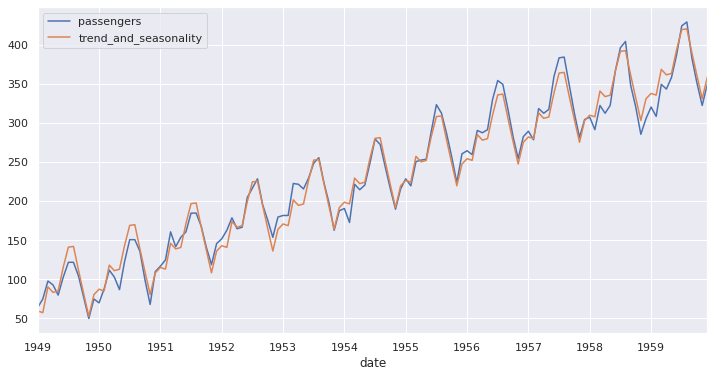

In [33]:
df_train[['passengers', 'trend_and_seasonality']].plot()

### This is pretty good: Modeling ONLY trend and seasonality provies us a good baseline model.

### The final component of Time Series: The remainder

In [34]:
df_train['remainder'] = df_train['passengers'] - df_train['trend_and_seasonality']

<AxesSubplot:xlabel='date'>

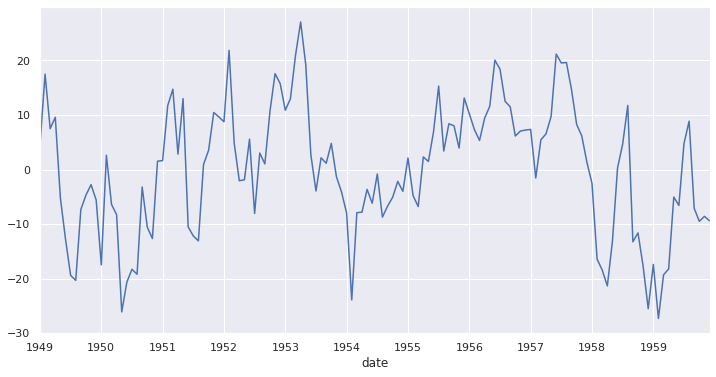

In [35]:
df_train['remainder'].plot()

In [36]:
df_train['remainder'].to_csv('flights_remainder.csv')
#you will work with this in the afternoon

So in the next lecture, you will learn how to extract meaningful information from the remainder:
- it's likely that much of it is noise
- However, there could be some other patterns worth modeling (i.e. time dependence)

---

### BONUS: One-liner in Statsmodels

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
sd = seasonal_decompose(df_train['passengers'])

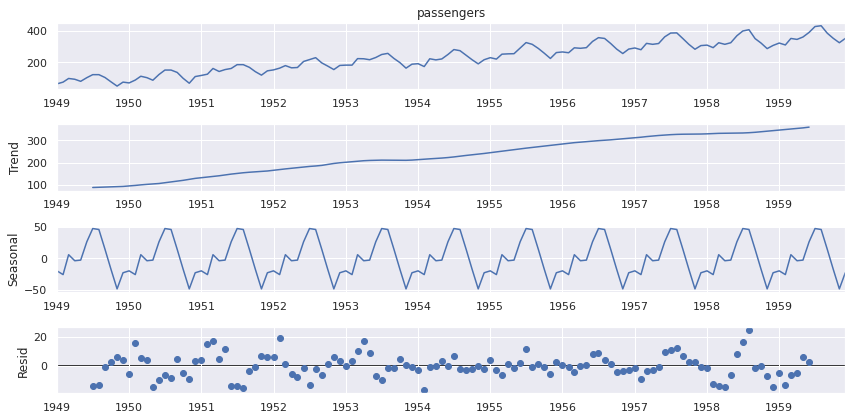

In [39]:
sd.plot()
None